# Modeling Car Insurance Claim Outcomes

This R notebook dives into customer data analysis using logistic regression to forecast whether clients will file car insurance claims. 

The initial focus involves thorough data cleaning to ensure accuracy for subsequent modeling. By crafting individual logistic regression models for each feature, the aim is to pinpoint the most influential feature accurately predicting insurance claims. 

The result highlights the feature with the highest predictive accuracy, empowering the company with actionable insights for informed decision-making in risk assessment strategies within the competitive insurance landscape.

## Importing Libraries and Reading the Data

In [14]:
# Import required libraries
library(readr)
library(dplyr)
library(glue)
library(yardstick)
library(ggplot2)

# Read in dataset
cars = read_csv('car_insurance.csv')

# View data types
str(cars)

Rows: 10000 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): id, age, gender, race, driving_experience, education, income, cred...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [10,000 × 19] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                 : num [1:10000] 569520 750365 199901 478866 731664 ...
 $ age                : num [1:10000] 3 0 0 0 1 2 3 1 2 2 ...
 $ gender             : num [1:10000] 0 1 0 1 1 0 1 0 0 0 ...
 $ race               : num [1:10000] 1 1 1 1 1 1 1 1 1 1 ...
 $ driving_experience : num [1:10000] 0 0 0 0 1 2 3 0 2 0 ...
 $ education          : num [1:10000] 2 0 2 3 0 2 2 3 3 2 ...
 $ income             : num [1:10000] 3 0 1 1 1 3 3 1 1 3 ...
 $ credit_score       : num [1:10000] 0.629 0.358 0.493 0.206 0.388 ...
 $ vehicle_ownership  : num [1:10000] 1 0 1 1 1 1 0 0 0 1 ...
 $ vehicle_year       : num [1:10000] 1 0 0 0 0 1 1 1 0 0 ...
 $ married            : num [1:10000] 0 0 0 0 0 0 1 0 1 0 ...
 $ children           : num [1:10000] 1 0 0 1 0 1 1 1 0 1 ...
 $ postal_code        : num [1:10000] 10238 10238 10238 32765 32765 ...
 $ annual_mileage     : num [1:10000] 12000 16000 11000 11000 12000 13000 13000 14000 13000 1100

## Investigate and Clean the Data

In [15]:
# Missing values per column
colSums(is.na(cars))

id                 age              gender                race 
                  0                   0                   0                   0 
 driving_experience           education              income        credit_score 
                  0                   0                   0                 982 
  vehicle_ownership        vehicle_year             married            children 
                  0                   0                   0                   0 
        postal_code      annual_mileage        vehicle_type speeding_violations 
                  0                 957                   0                   0 
               duis      past_accidents             outcome 
                  0                   0                   0

In [16]:
# Distribution of credit_score
summary(cars$credit_score)

# Distribution of annual_mileage
summary(cars$annual_mileage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0534  0.4172  0.5250  0.5158  0.6183  0.9608     982 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2000   10000   12000   11697   14000   22000     957 

In [17]:
# Fill missing values with the mean
cars$credit_score[is.na(cars$credit_score)] <- mean(cars$credit_score, na.rm = TRUE)
cars$annual_mileage[is.na(cars$annual_mileage)] <- mean(cars$annual_mileage, na.rm = TRUE)

## Visualize the Data

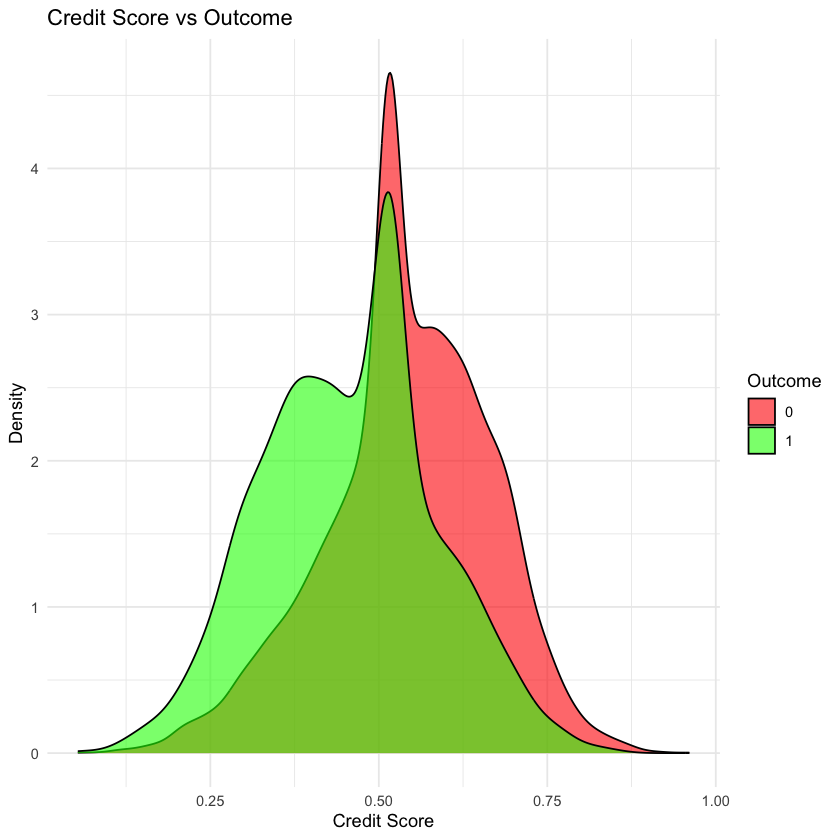

In [18]:
# Visualize relationship between credit_score and outcome
ggplot(cars, aes(x = credit_score, fill = factor(outcome))) +
  geom_density(alpha = 0.6) +
  labs(title = "Credit Score vs Outcome", x = "Credit Score", y = "Density", fill = "Outcome") +
  scale_fill_manual(values = c("red", "green")) +
  theme_minimal()


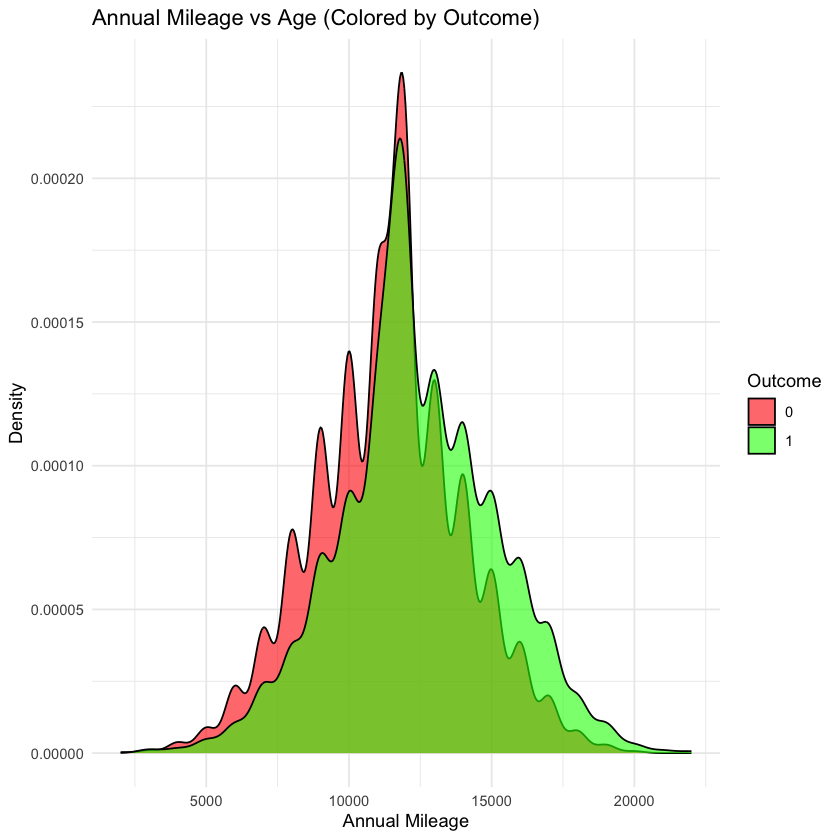

In [19]:
# Visualize relationship between annual_mileage and age
ggplot(cars, aes(x = annual_mileage, fill = factor(outcome))) +
  geom_density(alpha = 0.6) +
  labs(title = "Annual Mileage vs Age (Colored by Outcome)", x = "Annual Mileage", y = "Density", fill = "Outcome") +
  scale_fill_manual(values = c("red", "green")) +
  theme_minimal()


## Creating simple Logistic Regression models 
Each with a single feature and assessing their accuracy

In [20]:
# Create a dataframe to store features  
# Exclude columns not required in regression testing
features_df <- data.frame(features = c(names(subset(cars, select = -c(id, outcome)))))
features_df

features
<chr>
age
gender
race
driving_experience
education
income
credit_score
vehicle_ownership
vehicle_year


In [21]:
# Empty vector to store accuracies
accuracies <- c()

# Loop through features

for (col in features_df$features) {
    model <- glm(glue('outcome ~ {col}'), data = cars, family = 'binomial')
    predictions <- round(fitted(model))
    accuracy <- length(which(predictions == cars$outcome)) / length(cars$outcome)
	features_df[which(features_df$features == col), "accuracy"] = accuracy
}

## Best Feature to Predict the Claims

In [22]:
# Find the feature with the largest accuracy
best_feature <- features_df$features[which.max(features_df$accuracy)]
best_accuracy <- max(features_df$accuracy)

# Create best_feature_df
best_feature_df <- data.frame(best_feature, best_accuracy)

best_feature_df

best_feature,best_accuracy
<chr>,<dbl>
driving_experience,0.7771


#### The output indicates that the 'driving_experience' feature had the highest accuracy of approximately 0.7771 in predicting the 'outcome' variable. So, out of all the features analyzed, 'driving_experience' showed the strongest association or predictive power with the 'outcome'.

## Other Features to Predict the Claims

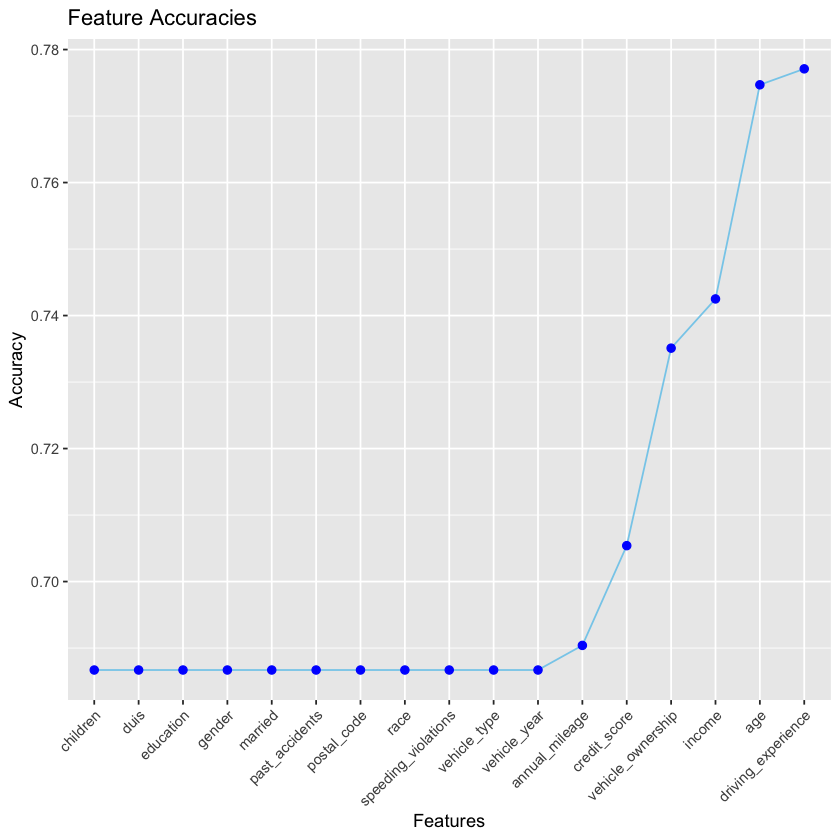

In [23]:
# Line plot to visualize feature accuracies
ggplot(features_df, aes(x = reorder(features, accuracy), y = accuracy, group = 1)) +
  geom_line(color = "skyblue") +
  geom_point(color = "blue", size = 2) +
  labs(title = "Feature Accuracies", x = "Features", y = "Accuracy") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
